<a href="https://colab.research.google.com/github/hetanshipatel/real-time-stock-price-prediction/blob/main/notebooks/01_data_collection_and_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance pandas matplotlib

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
STOCK_TICKER = input("Enter stock ticker (e.g., AAPL, TSLA): ").upper()
START_DATE = "2015-01-01"

Enter stock ticker (e.g., AAPL, TSLA): AAPL


In [4]:
stock_df = yf.Ticker(STOCK_TICKER).history(start=START_DATE)

if stock_df.empty:
    raise ValueError("Invalid ticker or no data found")

stock_df.reset_index(inplace=True)
stock_df.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2015-01-02 00:00:00-05:00,24.694235,24.705320,23.798600,24.237551,212818400,0.0,0.0
1,2015-01-05 00:00:00-05:00,24.006998,24.086807,23.368526,23.554747,257142000,0.0,0.0
2,2015-01-06 00:00:00-05:00,23.619034,23.816340,23.195602,23.556961,263188400,0.0,0.0
3,2015-01-07 00:00:00-05:00,23.765348,23.987040,23.654503,23.887280,160423600,0.0,0.0
4,2015-01-08 00:00:00-05:00,24.215380,24.862719,24.097882,24.805079,237458000,0.0,0.0


In [5]:
external_tickers = {
    "SP500": "^GSPC",
    "NASDAQ": "^IXIC",
    "VIX": "^VIX",
    "US10Y": "^TNX"
}

external_dfs = []

for name, ticker in external_tickers.items():
    df_ext = yf.Ticker(ticker).history(start=START_DATE)[["Close"]]
    df_ext = df_ext.rename(columns={"Close": name})
    df_ext.reset_index(inplace=True)
    external_dfs.append(df_ext)


In [6]:
df = stock_df.copy()

for ext_df in external_dfs:
    df = pd.merge(df, ext_df, on="Date", how="left")

df.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,SP500,NASDAQ,VIX,US10Y
0,2015-01-02 00:00:00-05:00,24.694235,24.705320,23.798600,24.237551,212818400,0.0,0.0,2058.199951,4726.810059,17.790001,NaN
1,2015-01-05 00:00:00-05:00,24.006998,24.086807,23.368526,23.554747,257142000,0.0,0.0,2020.579956,4652.569824,19.920000,NaN
2,2015-01-06 00:00:00-05:00,23.619034,23.816340,23.195602,23.556961,263188400,0.0,0.0,2002.609985,4592.740234,21.120001,NaN
3,2015-01-07 00:00:00-05:00,23.765348,23.987040,23.654503,23.887280,160423600,0.0,0.0,2025.900024,4650.470215,19.309999,NaN
4,2015-01-08 00:00:00-05:00,24.215380,24.862719,24.097882,24.805079,237458000,0.0,0.0,2062.139893,4736.189941,17.010000,NaN


In [7]:
today = datetime.today().strftime("%Y-%m-%d")
file_name = f"{STOCK_TICKER}_raw_data_{today}.csv"
df.to_csv(file_name, index=False)
file_name

'AAPL_raw_data_2026-01-15.csv'

In [8]:
from google.colab import files
files.download(file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

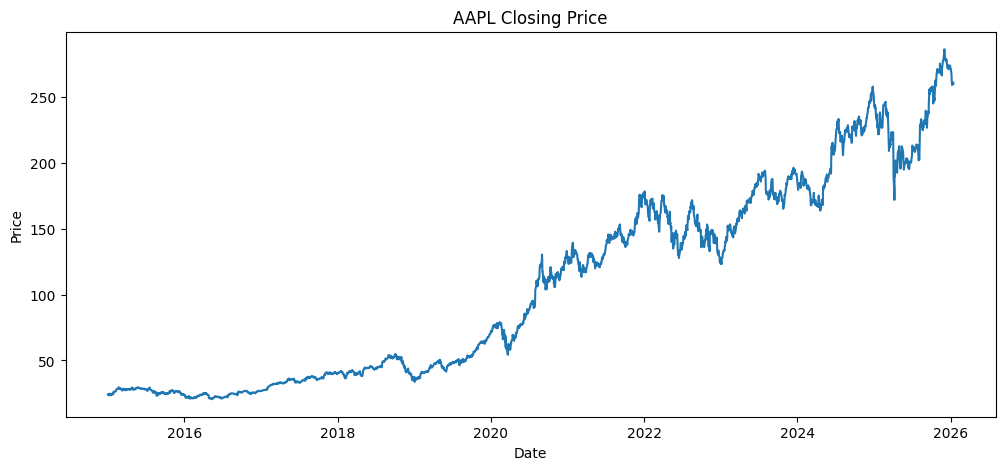

In [9]:
plt.figure(figsize=(12,5))
plt.plot(df["Date"], df["Close"])
plt.title(f"{STOCK_TICKER} Closing Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

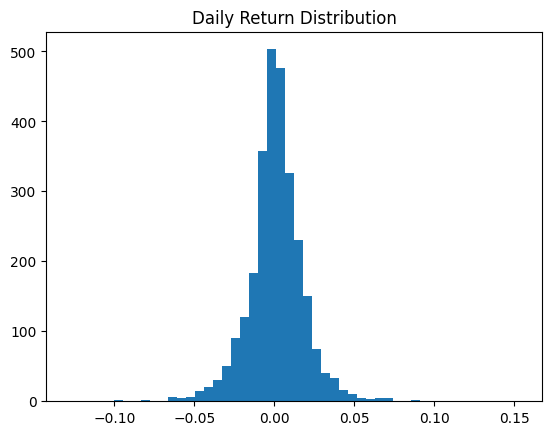

In [10]:
df["Daily_Return"] = df["Close"].pct_change()

plt.hist(df["Daily_Return"].dropna(), bins=50)
plt.title("Daily Return Distribution")
plt.show()

**Observation**